In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


In [2]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
#  %matplotlib notebook

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.

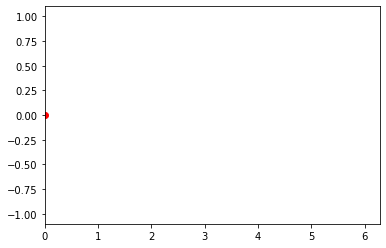

In [6]:
t = np.linspace(0, 2*np.pi, 100)
x = t
y = np.sin(x+t/10)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 2*np.pi))
ax.set_ylim((-1.1,1.1))
particle, = plt.plot([],[], marker='o', color='r')
traj, = plt.plot([], [],color='r', alpha=0.5)

def update(i):
    particle.set_data(x[i], y[i])
    traj.set_data(x[:i+1], y[:i+1])
    return particle, traj

ani = animation.FuncAnimation(fig, update,frames=range(100), interval=25)
HTML(ani.to_html5_video())

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

In [41]:
# set up figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim((-1.1,1.1))
ax.set_ylim((-1.1,1.1))
ax.set_zlim((-1.1,1.1))

# load planet data
orbits = np.load('orbits.npz')

mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']

# plot each celestial orbit
ax.plot([0],[0],[0], 'o', label='Sun', color='yellow')

ax.plot(mercury[:,0], mercury[:,1], mercury[:,2], label='Mercury', color='grey',)
ax.plot(mercury[0:1,0], mercury[0:1,1], mercury[0:1,2], 'o', color='grey')
ax.plot(venus[:,0], venus[:,1], venus[:,2], label='Venus', color='orange')
ax.plot(venus[55:56,0], venus[55:56,1], venus[55:56,2], 'o', color='orange')
ax.plot(earth[:,0], earth[:,1], earth[:,2], label='Earth', color='blue')
ax.plot(earth[0:1,0], earth[0:1,1], earth[0:1,2], 'o', color='blue')
ax.plot(mars[:,0], mars[:,1], mars[:,2], label='Mars', color='red')
ax.plot(mars[25:26,0], mars[25:26,1], mars[25:26,2], 'o', color='red')

# formatting of plot
ax.legend(loc='upper left')
ax.set_xticks(ticks=np.linspace(-1, 1, 5))
ax.set_yticks(ticks=np.linspace(-1, 1, 5))
ax.set_zticks(ticks=np.linspace(-1, 1, 5))
ax.set_title("Orbits of the Inner Planets")
fig.show()


## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4". Embed you anumated plot.

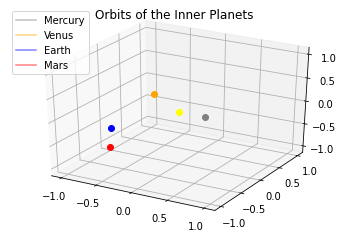

In [50]:
# set up figure
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim((-1.1,1.1))
ax.set_ylim((-1.1,1.1))
ax.set_zlim((-1.1,1.1))

# load celestial bodies
orbits = np.load('orbits.npz')

mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']

# set lists of x,y,z coordinates
mercury_x = mercury[:,0]
mercury_y = mercury[:,1]
mercury_z = mercury[:,2]
venus_x = venus[:,0]
venus_y = venus[:,1]
venus_z = venus[:,2]
earth_x = earth[:,0]
earth_y = earth[:,1]
earth_z = earth[:,2]
mars_x = mars[:,0]
mars_y = mars[:,1]
mars_z = mars[:,2]
sun_x = 0
sun_y = 0
sun_z = 0

# define objects for particles and trajectories
sun, = plt.plot([],[],[], marker='o', color='yellow')
merc_particle, = plt.plot([],[],[], marker='o', color='grey')
merc_traj, = plt.plot([],[],[], color='grey', label='Mercury', alpha=0.5)
venus_particle, = plt.plot([],[],[], marker='o', color='orange')
venus_traj, = plt.plot([],[],[], color='orange', label='Venus', alpha=0.5)
earth_particle, = plt.plot([],[],[], marker='o', color='blue')
earth_traj, = plt.plot([],[],[], color='blue', label='Earth', alpha=0.5)
mars_particle, = plt.plot([],[],[], marker='o', color='red')
mars_traj, = plt.plot([],[],[], color='red', label='Mars', alpha=0.5)

# define update function to step through coordinates
def update(i):
    sun.set_data(sun_x, sun_y)
    sun.set_3d_properties(sun_z)
    merc_particle.set_data(mercury_x[i], mercury_y[i])
    merc_particle.set_3d_properties(mercury_z[i])
    merc_traj.set_data(mercury_x[:i+1], mercury_y[:i+1])
    merc_traj.set_3d_properties(mercury_z[:i+1])
    venus_particle.set_data(venus_x[i], venus_y[i])
    venus_particle.set_3d_properties(venus_z[i])
    venus_traj.set_data(venus_x[:i+1], venus_y[:i+1])
    venus_traj.set_3d_properties(venus_z[:i+1])
    earth_particle.set_data(earth_x[i], earth_y[i])
    earth_particle.set_3d_properties(earth_z[i])
    earth_traj.set_data(earth_x[:i+1], earth_y[:i+1])
    earth_traj.set_3d_properties(earth_z[:i+1])
    mars_particle.set_data(mars_x[i], mars_y[i])
    mars_particle.set_3d_properties(mars_z[i])
    mars_traj.set_data(mars_x[:i+1], mars_y[:i+1])
    mars_traj.set_3d_properties(mars_z[:i+1])
    return merc_particle, merc_traj, venus_particle, venus_traj, earth_particle, earth_traj, mars_particle, mars_traj

# formatting of plot
ax.legend(loc='upper left')
ax.set_xticks(ticks=np.linspace(-1, 1, 5))
ax.set_yticks(ticks=np.linspace(-1, 1, 5))
ax.set_zticks(ticks=np.linspace(-1, 1, 5))
ax.set_title("Orbits of the Inner Planets")

# write animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()
ani = animation.FuncAnimation(fig, update,frames=range(len(mercury_x)), interval=25)

# save animation
ani.save('planet_ani.mp4')

In [51]:
# load animation
from base64 import b64encode
mp4 = open('planet_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

In [69]:
# import colormap
from matplotlib import cm


# set up mesh grid for bivariate density function
X, Y = np.meshgrid(np.linspace(-4, 4, 50), np.linspace(-4,4,50))

# define f(x)
Sigma = np.array([[1, 3.0/5], [3.0/5, 2]])
Sigma_inv = np.linalg.inv(Sigma)
denom = np.sqrt(np.linalg.det(2*np.pi*Sigma))
mu = np.array([0,0])
def f(x):
    # x must be a (2,1) vector [x,y].T
    return 1.0/denom * np.exp(-1.0/2 *(x.reshape((2,1))-mu.reshape((2,1)) ).reshape((1,2))@Sigma_inv@((x.reshape((2,1))-mu.reshape((2,1)))))

# create Z
Z = np.empty_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f(np.array([X[i,j], Y[i,j]]))

# set up figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))
ax.set_zlim((0,0.13))
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm) # plot with colormap

ax.set_xticks(ticks=np.linspace(-4, 4, 5))
ax.set_yticks(ticks=np.linspace(-4, 4, 5))
ax.set_zticks(ticks=np.linspace(0.02, 0.12, 6))
ax.set_title("Bivariate Normal PDF")
fig.show()


## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation as `vibration.mp4`.

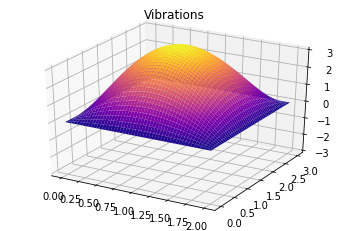

In [89]:
# import colormap
from matplotlib import cm

# load vibrations
vibrations = np.load('vibration.npz')
X = vibrations['X']
Y = vibrations['Y']
Z = vibrations['Z'][:, :, :]

# set up figure
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot surface initially
surface = ax.plot_surface(X,Y,Z[0, :, :], cmap=cm.plasma)

ax.set_xticks(ticks=np.linspace(-3, 3, 7))
ax.set_yticks(ticks=np.linspace(-3, 3, 7))
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))
ax.set_zlim((-3,3))

# define update function to step through coordinates
def update(i):
    ax.clear()
    ax.plot_surface(X, Y, Z[i, :, :], cmap=cm.plasma)
    ax.set_zlim((-3,3))
    ax.set_zticks(ticks=np.linspace(-3, 3, 7))
    ax.set_title("Vibrations")

# write animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()
ani = animation.FuncAnimation(fig, update,frames=range(Z.shape[0]), interval=50)

# save animation
ani.save('vibrations_ani.mp4')

In [91]:
# load animation
from base64 import b64encode
mp4 = open('vibrations_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)